Howdy

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
def gillepsie(initial, event_rates, duration):
    
    time = [0]
    values = [initial]
    
    # Stop when when  
    while time[-1] < duration:
        
        # Get most resent values
        update = values[-1].copy()
        
        # Determine probability/rate
        probabilities = [event_rates[0]*sum(update), # Birth
                       event_rates[1]*update[0]*update[1]/sum(update), # Infection
                       event_rates[2]*update[1], # Recovery
                       event_rates[3]*update[0], # Death S
                       event_rates[4]*update[1], # Death I
                       event_rates[5]*update[2]] # Death R
            
        # Determine the next event
        dt = []
        for rate in probabilities:
            if rate == 0:
                dt.append(np.inf)
            else:
                dt.append(-1/rate*np.log(random.random()))
            
        t = time[-1] + min(dt)
        event = dt.index(min(dt))
         
        # Compute event
        if event == 0:
            # Birth
            update[0] += 1
            
        elif event == 1:
            # Infection
            update[0] -= 1
            update[1] += 1
            
        elif event == 2:
            # Recovery
            update[1] -= 1
            update[2] += 1
            
        elif event == 3:
            # Death susceptible
            update[0] -= 1
            
        elif event == 4:
            # Death infected
            update[1] -= 1
            
        elif event == 5:
            # Death Recovered
            update[2] -= 1
        
        # Make sure population >= 0
        if update[0] < 0:
            update[0] = 0
        elif update[1] < 0:
            update[1] = 0
        elif update[2] < 0:
            update[2] = 0
            
        
        # append the data
        time.append(t)
        values.append(update)
        
    return time, values

In [4]:
def SIR_demography(y, t, N, infection_rate, recover_rate, birth_death_rate):
    '''SIR model with demography'''
    
    dSdt = birth_death_rate - infection_rate*y[0]*y[1] - birth_death_rate*y[0]
    dIdt = infection_rate*y[0]*y[1] - recover_rate*y[1] - birth_death_rate*y[1]
    dRdt = recover_rate*y[1] - birth_death_rate*y[2]
    
    return [dSdt, dIdt, dRdt]

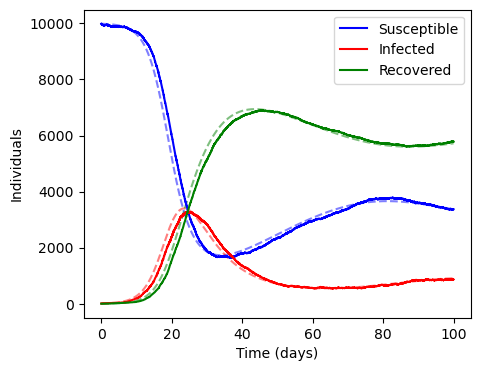

In [5]:
# Define population parameters
N = 10000
I0 = 10

# Define model parameters
infection_rate = 1/2
recover_rate = 1/7
birth_death_rate = 0.02

# Duration of simulation
days = 100

# Parameters for gillepsie algorithm
initial = [N-I0, I0, 0]
event_rates = [birth_death_rate, infection_rate, recover_rate, birth_death_rate, birth_death_rate, birth_death_rate]

# Run gillepsie algorithm
time, values = gillepsie(initial, event_rates, 100)

# Gather values over time for each compartment
susceptible = [event[0] for event in values]
infected = [event[1] for event in values]
recovered = [event[2] for event in values]

# Inital parameters deterministic model
y0 = [(N-I0)/N, I0/N, 0]

# Determine timesteps and resolution
t = np.linspace(0, days, 1001)

# Get deteministic solution
solution = odeint(SIR_demography, y0, t, args=(N, infection_rate, recover_rate, birth_death_rate))

# Plot data
fig = plt.figure(figsize=(5,4))

# Plot deteministic model
plt.plot(t, solution[:,0] * 10000,'b--', alpha=0.5)
plt.plot(t, solution[:,1] * 10000,'r--', alpha=0.5)
plt.plot(t, solution[:,2] * 10000,'g--', alpha=0.5)

# Plot gillepsie model
plt.plot(time, susceptible, 'b-', label=r'Susceptible')
plt.plot(time, infected, 'r-', label=r'Infected')
plt.plot(time, recovered, 'g-', label=r'Recovered')

plt.ylabel('Individuals')
plt.xlabel('Time (days)')
plt.legend(loc='best')
plt.show()

In [ ]:
all_times = []
all_values = []

initial = [9990, 10, 0]
event_rates = [0.02, 1/2, 1/7, 0.02, 0.02, 0.02]

for i in range(10):

    time, values = gillepsie(initial, event_rates, 100)
    
    all_times.append(time)
    all_values.append(values)

print(all_values)
print(all_times)